In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
st = pd.read_csv('50_Startups.csv')
st.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
st['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

# Using One Hot Encoding to replace the categorical values of 'State' column.

In [7]:
st=pd.get_dummies(st,columns=['State'])

In [8]:
st.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [9]:
st[st.duplicated()]

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York


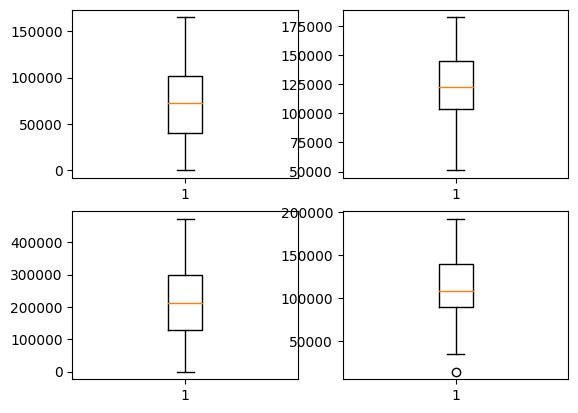

In [10]:
for i in range(0,4):
  k = st.iloc[:,i]
  plt.subplot(2,2,i+1)
  plt.boxplot(k)

In [11]:
st.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [12]:
st['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

In [13]:
st.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


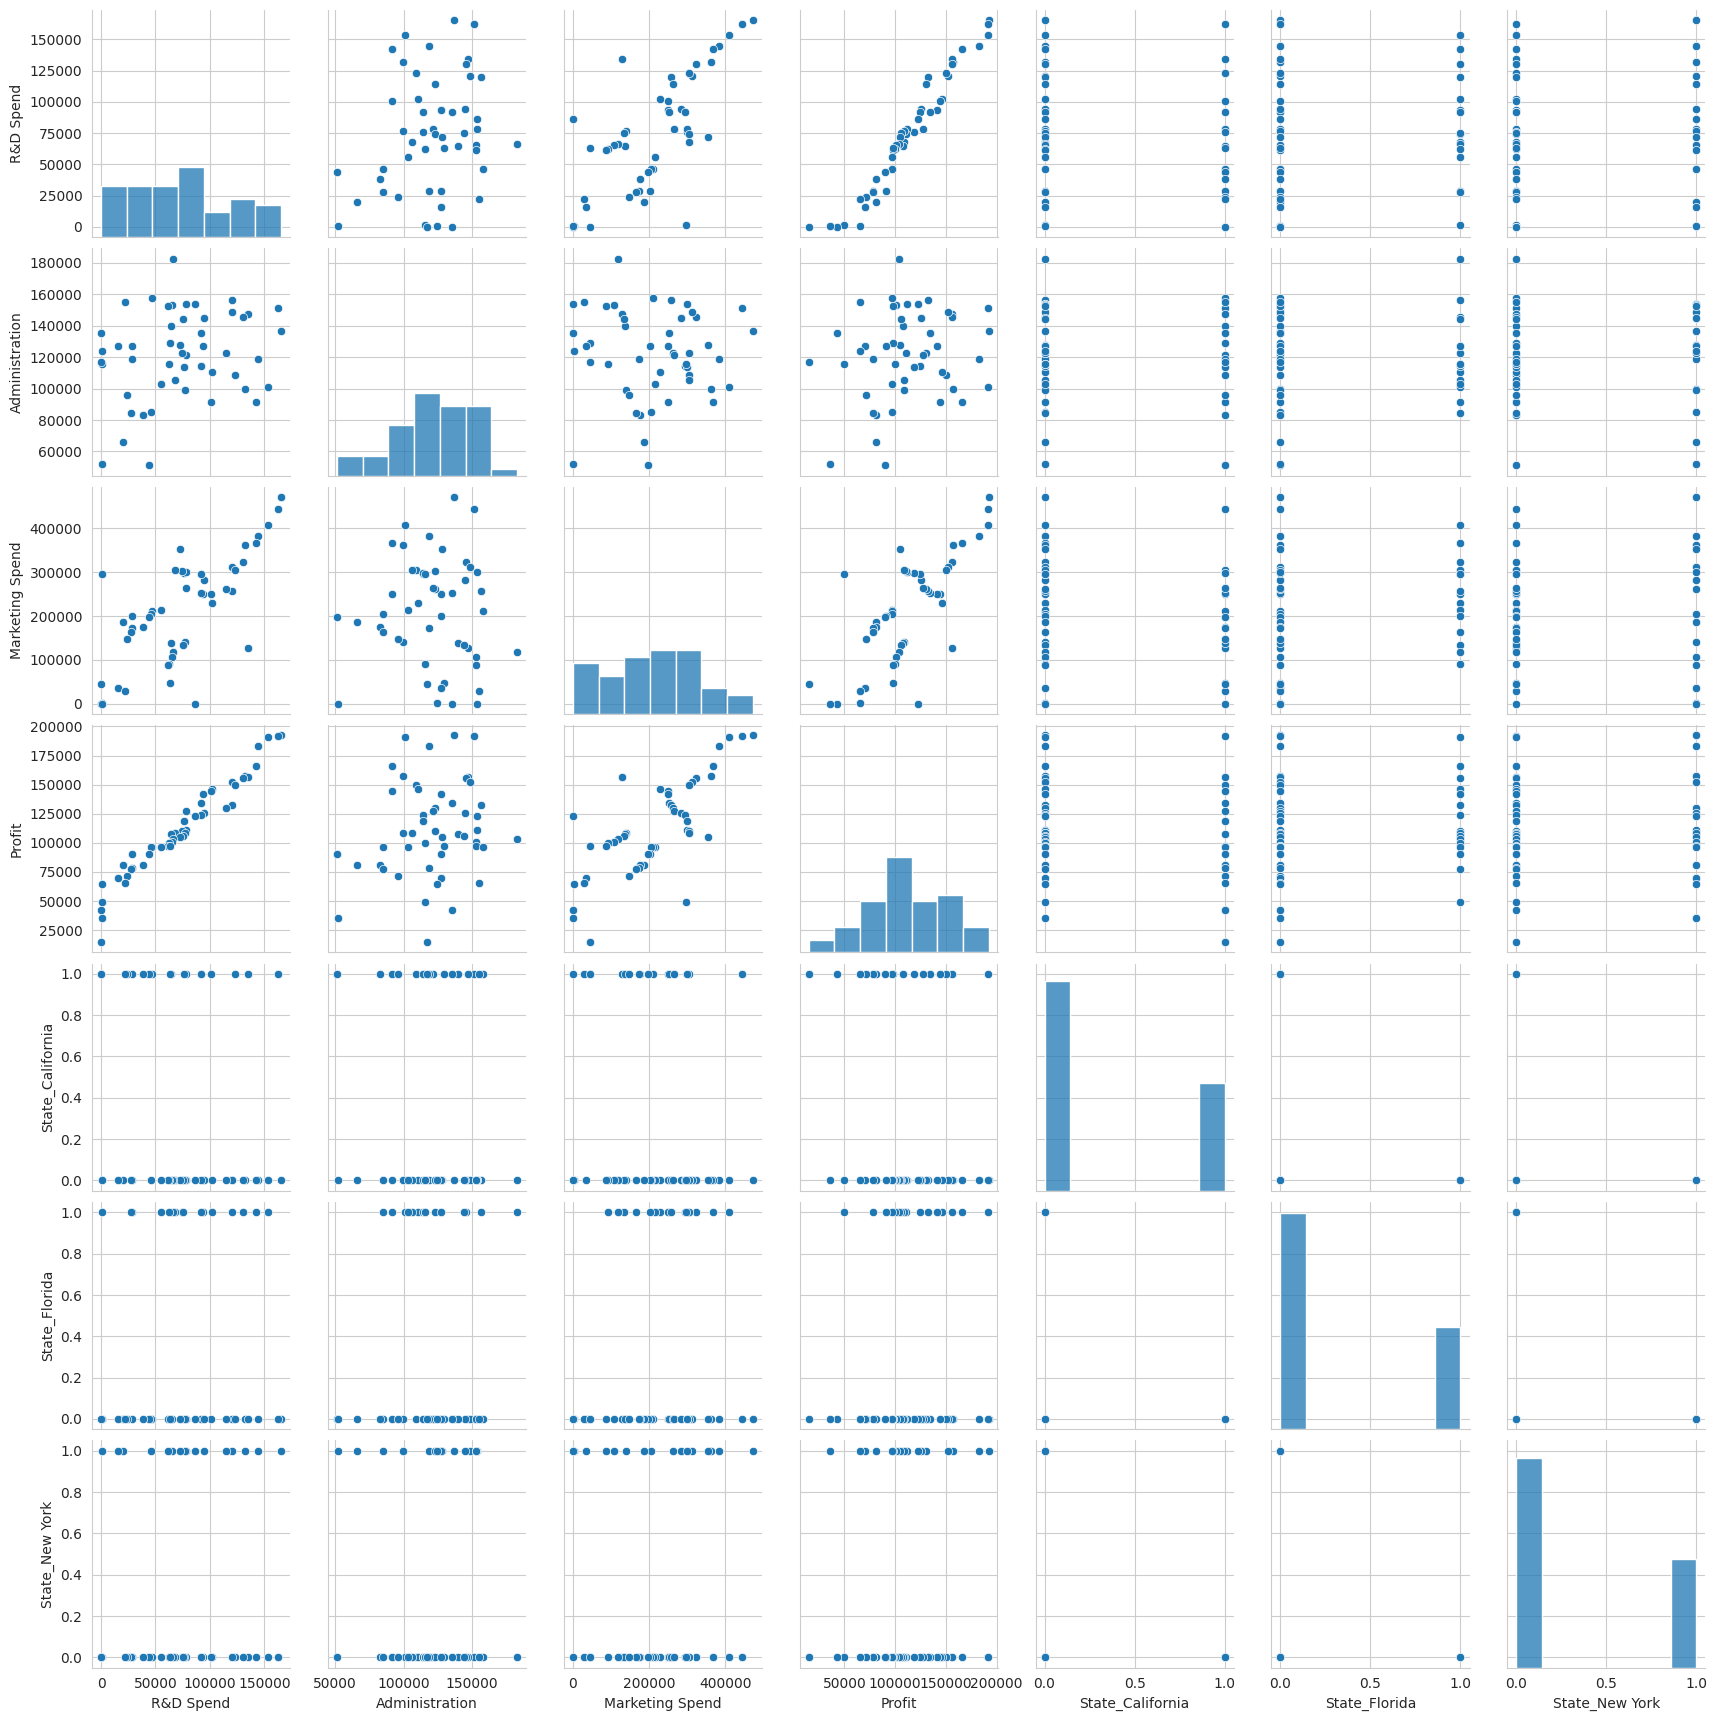

In [14]:
sns.set_style(style='whitegrid')
sns.pairplot(st)

In [15]:
st.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [16]:
st=st.rename({'R&D Spend': 'RnD_Spend','Marketing Spend':'Marketing_Spend', 'State_New York': 'State_New_York'},axis=1)
st.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#Building Multi Linear Model

In [17]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~ RnD_Spend + Administration + Marketing_Spend', data= st).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 14 May 2023   Prob (F-statistic):           4.53e-30
Time:                        11:51:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
round(model.pvalues,6)

Intercept          0.000000
RnD_Spend          0.000000
Administration     0.601755
Marketing_Spend    0.104717
dtype: float64

Here, 'Administration' column and 'Marketing_Spend' column failed to accept the Null Hypothesis

# Simple Linear Models

In [20]:
SLmodel1 = smf.ols('Profit ~ Administration', data= st).fit()

In [21]:
SLmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 14 May 2023   Prob (F-statistic):              0.162
Time:                        11:51:16   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
SLmodel2 = smf.ols('Profit ~ Marketing_Spend', data= st).fit()

In [23]:
SLmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 14 May 2023   Prob (F-statistic):           4.38e-10
Time:                        11:51:16   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [24]:
rsq_Admin = smf.ols('Administration ~ RnD_Spend + Marketing_Spend',data=st).fit().rsquared
vif_Admin = 1/(1-rsq_Admin) 

rsq_RnD = smf.ols('RnD_Spend ~ Administration + Marketing_Spend',data=st).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD) 

rsq_M_S = smf.ols('Marketing_Spend ~ RnD_Spend + Administration',data=st).fit().rsquared  
vif_M_S = 1/(1-rsq_M_S) 

d1 = {'Variables':['Admin','Rnd','Marketing_Spend'],'VIF':[vif_Admin, vif_RnD, vif_M_S]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Admin,1.175091
1,Rnd,2.468903
2,Marketing_Spend,2.326773


# Residual Analysis

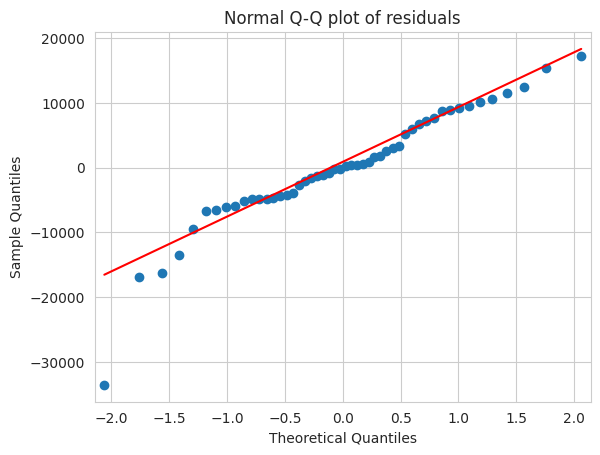

In [25]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [26]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

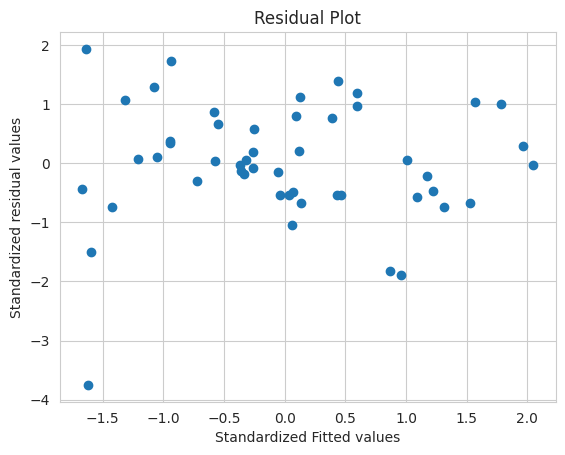

In [27]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual V Regressor

eval_env: 1


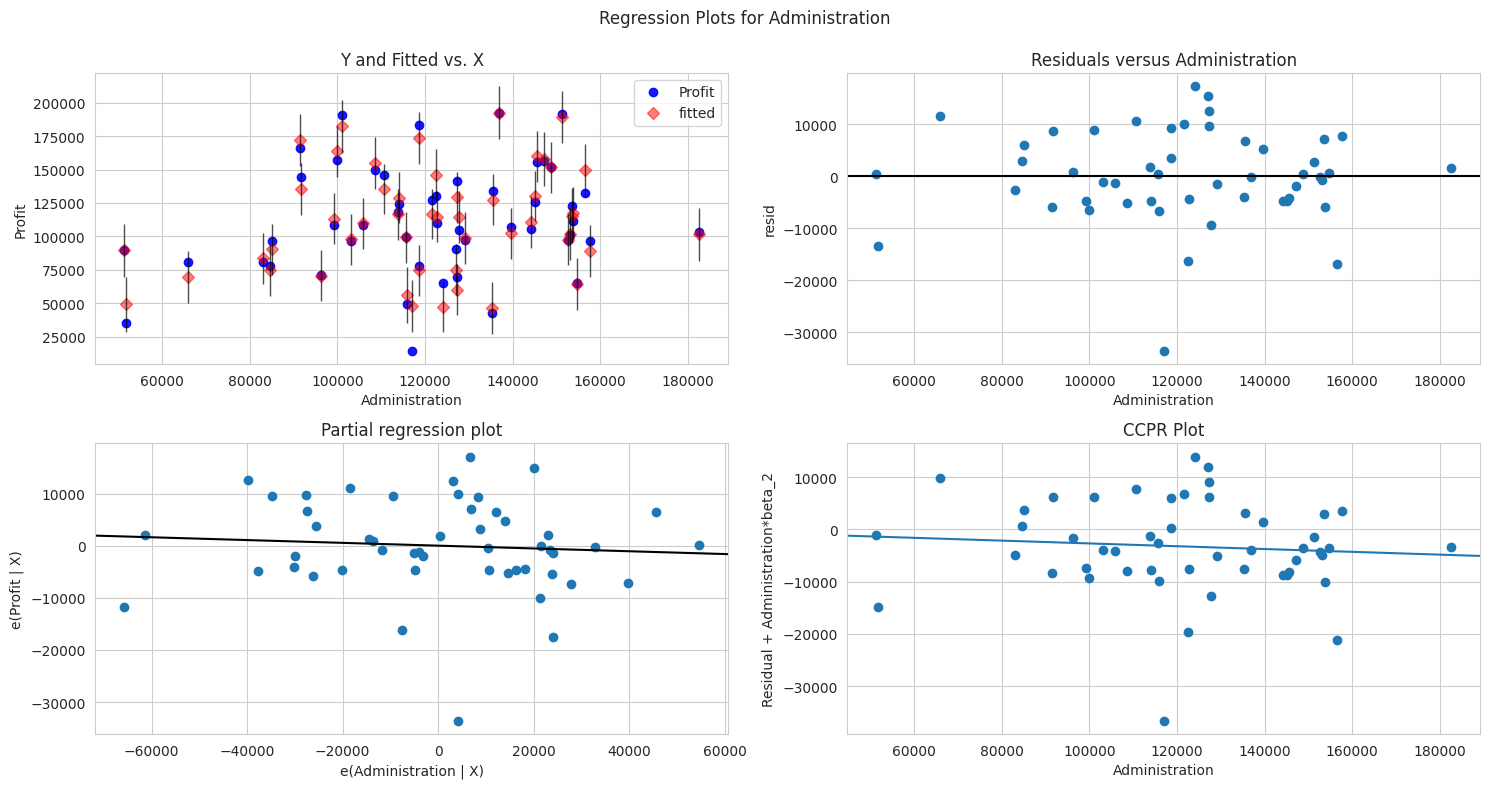

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In the partial regression plot above, the slanted line shows that the variable Administration is contributing to y value which is Profit.

In [30]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

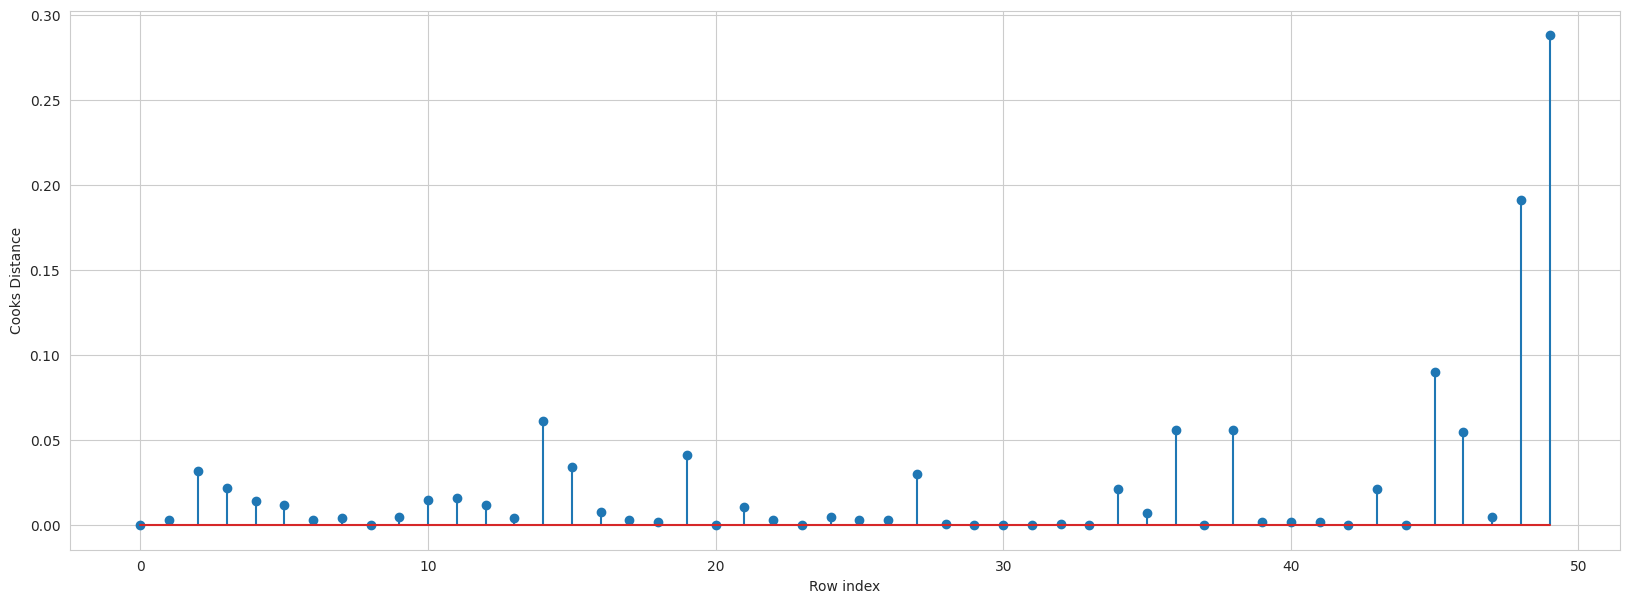

In [31]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(st)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

# To Find High Influence points

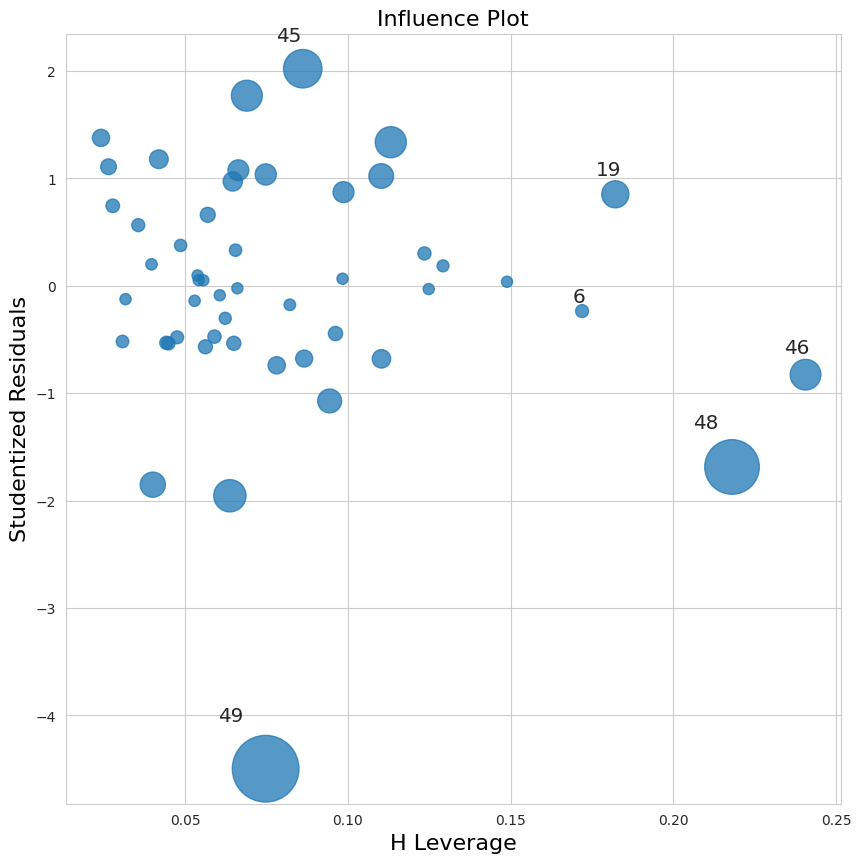

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(10, 10))
influence_plot(model, ax=ax)
plt.show()

In [34]:
k = st.shape[1]
n = st.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

There are no outliers or Influence points in the data. So the original model with R-squared 0.951 is used to predict for new values

# Predicting for new data

In [35]:
new_data=pd.DataFrame({'RnD_Spend':[14548.56,15286.65,20568.54,17824.63], 'Administration': [92568.89,100000.25,85467.36,92741.85], 'Marketing_Spend': [388956.58,40589.56,41879.51,37425.58]},index=[1,2,3,4])
new_data

,RnD_Spend,Administration,Marketing_Spend
1,14548.56,92568.89,388956.58
2,15286.65,100000.25,40589.56
3,20568.54,85467.36,41879.51
4,17824.63,92741.85,37425.58


In [38]:
new_data['Predicted'] = model.predict(new_data)
new_data

,RnD_Spend,Administration,Marketing_Spend,Predicted
1,14548.56,92568.89,388956.58,69952.397273
2,15286.65,100000.25,40589.56,60862.448584
3,20568.54,85467.36,41879.51,65542.983210
4,17824.63,92741.85,37425.58,63015.829239
